In [31]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint

plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")



In [10]:
current_dataset = 3
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110812-rbot.pcap', 'capture20110812.binetflow', 'README']

In [11]:
[i for i in os.listdir(path) if i.endswith(".binetflow") ]

['capture20110812.binetflow']

In [13]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established


In [14]:
df.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes
count,4.710638e+06,4.603832e+06,4.268271e+06,4.710638e+06,4.710638e+06,4.710638e+06
mean,1.779531e+02,1.762069e-01,2.727100e-04,3.560668e+01,2.617864e+04,6.983991e+03
std,6.783478e+02,5.775615e+00,2.629716e-02,3.986630e+03,3.411990e+06,2.239477e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00
25%,2.410000e-04,0.000000e+00,0.000000e+00,2.000000e+00,2.080000e+02,7.600000e+01
50%,3.620000e-04,0.000000e+00,0.000000e+00,2.000000e+00,2.440000e+02,8.100000e+01
75%,3.096770e-01,0.000000e+00,0.000000e+00,4.000000e+00,5.360000e+02,2.220000e+02
max,3.600000e+03,1.920000e+02,3.000000e+00,3.841063e+06,3.529904e+09,3.423408e+09


In [19]:
df.Proto.value_counts()

udp          3194929
tcp          1354744
icmp          132021
igmp           19696
arp             5195
rtp             1654
rtcp            1551
ipv6-icmp        544
ipx/spx          132
ipv6              70
pim               67
unas              10
udt                8
rarp               7
esp                4
llc                3
rsvp               3
Name: Proto, dtype: int64

In [22]:
df.Dir.value_counts()

  <->    3093367
   ->    1518998
  <-       78403
   ?>       8280
  <?>       6387
  who       5202
  <?           1
Name: Dir, dtype: int64

In [20]:
df.DstAddr.value_counts()

147.32.80.9        2246170
147.32.84.229       687631
147.32.85.100       276016
188.138.84.239       97412
87.98.230.229        55651
                    ...   
125.146.110.238          1
82.140.216.110           1
74.248.224.69            1
93.198.133.123           1
208.239.223.84           1
Name: DstAddr, Length: 125482, dtype: int64

In [21]:
df.Label.value_counts()

flow=To-Background-UDP-CVUT-DNS-Server              2169040
flow=Background-UDP-Established                      806119
flow=Background-TCP-Established                      729048
flow=Background-TCP-Attempt                          408887
flow=Background                                      156122
flow=From-Normal-V44-Stribrek                        108807
flow=Background-UDP-Attempt                          104089
flow=Background-Established-cmpgw-CVUT                85383
flow=From-Botnet-V44-TCP-Attempt                      26234
flow=To-Background-CVUT-WebServer                     24271
flow=Background-UDP-NTP-Established-1                 22345
flow=To-Background-CVUT-Proxy                         22009
flow=Background-Attempt-cmpgw-CVUT                    13659
flow=To-Background-MatLab-Server                       8937
flow=From-Normal-V44-Grill                             4580
flow=Background-google-pop                             2654
flow=From-Normal-V44-CVUT-WebServer     

In [25]:
df_Background = df[df.Label.str.contains("Background")]
df_Background

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established


In [26]:
df_Background = df[df.Label.str.contains("Botnet")]
df_Background

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
5328,2011/08/12 15:25:50.064002,3588.116699,tcp,38.229.70.20,6667,<?>,147.32.84.165,1027,PA_PA,0.0,0.0,81,5886,3753,flow=From-Botnet-V44-TCP-CC107-IRC-Not-Encrypted
61485,2011/08/12 15:53:17.142311,1966.745239,icmp,147.32.84.165,0x0303,->,81.166.246.198,0x8769,URP,0.0,NaN,3,285,285,flow=From-Botnet-V44-ICMP
129652,2011/08/12 16:27:56.085638,3519.105225,tcp,38.229.70.20,6667,<?>,147.32.84.165,1027,PA_PA,0.0,0.0,219,19248,9388,flow=From-Botnet-V44-TCP-CC107-IRC-Not-Encrypted
178233,2011/08/12 16:56:52.873156,0.000456,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Botnet-V44-UDP-DNS
181705,2011/08/12 16:59:13.459181,0.121586,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,292,72,flow=From-Botnet-V44-UDP-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520301,2011/08/15 09:25:26.819651,9.014144,tcp,147.32.84.165,2909,->,223.255.170.91,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt
4520369,2011/08/15 09:25:28.020389,9.013652,tcp,147.32.84.165,2910,->,223.255.178.83,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt
4532951,2011/08/15 09:29:18.079118,0.000000,udp,147.32.84.165,137,->,192.168.88.121,45366,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt
4576872,2011/08/15 09:42:00.883399,0.000000,udp,147.32.84.165,137,->,192.168.88.121,43886,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt


In [28]:
df["Backgroung_label"] = df.Label.str.contains("Background")
df["Normal_label"] = df.Label.str.contains("Normal")
df["Botnet_label"] = df.Label.str.contains("Botnet")

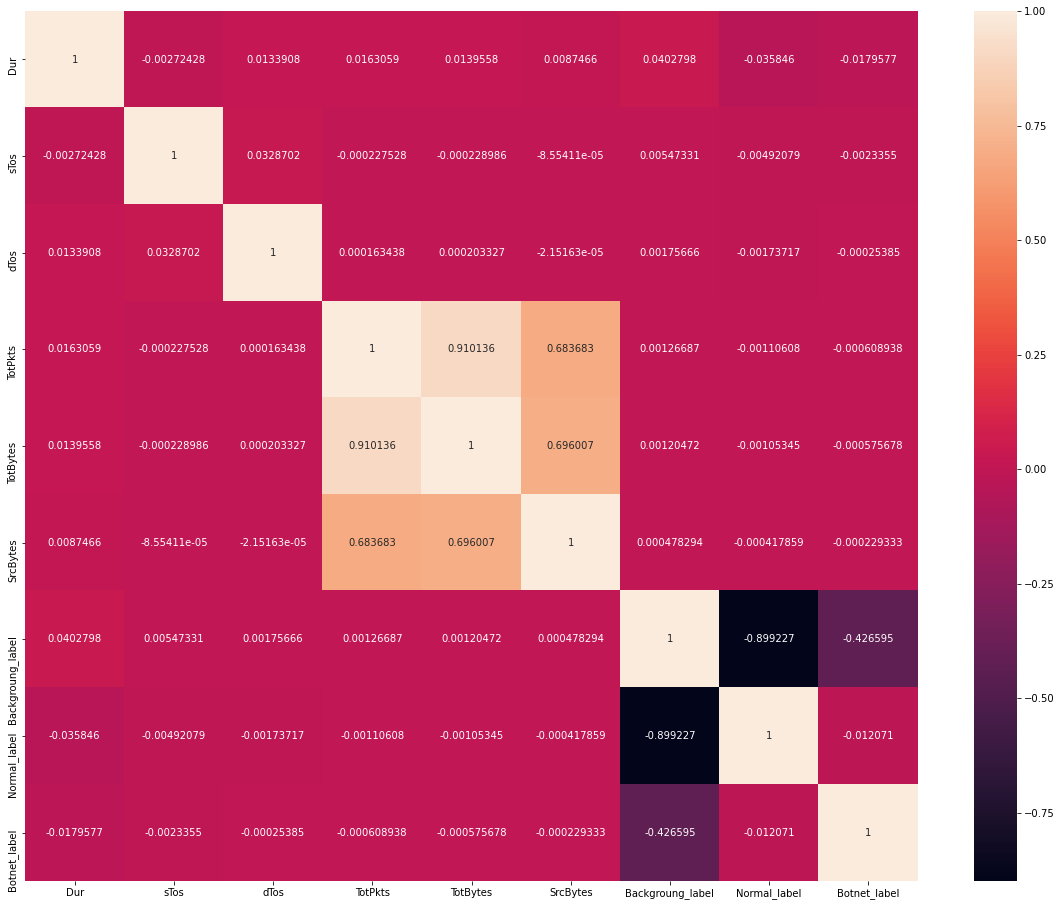

In [32]:
df_corr = df.corr()

ax= plt.subplot()
sns.heatmap(df_corr, annot=True, fmt='g', ax=ax); 
